# Pandas 을 이용한 통계 데이터 분석

Pandas 이용 데이터 파일의 통계 분석

Text(0.5, 1.0, '한글 타이틀...')

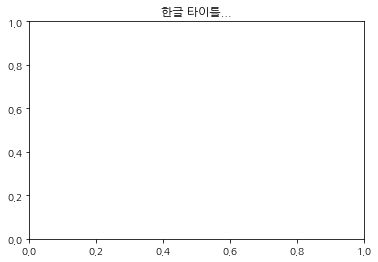

In [1]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
%matplotlib inline

font_path = 'C:/Windows/Fonts/NanumGothic.ttf'
fontname = fm.FontProperties(fname=font_path, size=18).get_name()  # 폰트 패밀리 이름!

plt.rc('font', family=fontname)  #  'NanumGothic'
# plt.rcParams["font.family"] = fontname

plt.rcParams['axes.unicode_minus'] = False #glypy 8722: Axes에 - 표시 안되는 것
plt.title('한글 타이틀...')

In [45]:
! conda list xlsxwriter

# packages in environment at C:\Users\daddy\miniconda3\envs\tf25_p39:
#
# Name                    Version                   Build  Channel


In [46]:
! conda install -y xlsxwriter

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\daddy\miniconda3\envs\tf25_p39

  added / updated specs:
    - xlsxwriter


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    xlsxwriter-3.0.2           |     pyhd3eb1b0_0         111 KB
    ------------------------------------------------------------
                                           Total:         111 KB

The following NEW packages will be INSTALLED:

  xlsxwriter         pkgs/main/noarch::xlsxwriter-3.0.2-pyhd3eb1b0_0

The following packages will be UPDATED:

  ca-certificates    conda-forge::ca-certificates-2021.10.~ --> pkgs/main::ca-certificates-2021.10.26-haa95532_2

The following packages will be SUPERSEDED by a higher-priority channel:

  certifi            conda-forge::certifi-2021.10.8-py39hc~ --> pkgs/main::certifi-2021.10.8-py39haa95532_0
  openssl            conda-forge::ope

데이터 파일

In [6]:
import numpy as np
import pandas as pd

df = pd.read_csv( 'data/지점별_일일_판매량.csv', index_col='날짜')
df.head()

,A지점,B지점,C지점
날짜,,,
2020-07-01,239.0,246.0,268.0
2020-07-02,249.0,257.0,279.0
2020-07-03,237.0,270.0,271.0
2020-07-06,252.0,262.0,273.0
2020-07-07,252.0,265.0,269.0


# 1. 통계 데이터 분석 기본

### 기본 통계량 이해

모집단, 표본, 관측값과 관측 변수에 대해 이해하고 기본 통계량 등에 대한 표현을 알아보자

#### 모집단 표본

통계학에서 관측 대상이 되는 전체를  데이터가 나타나는 현상의 전체를 **모집단population**이라 하고, 모집단에서 선택한 주어진 데이터를 **표본** 이라 한다. 모집단 전체를 전수 조사하는 것은 시간과 비용이 많이 들게 되므로 표본을 조사한다.

#### 관측변수

모집단, 표본의 특징을 나타내는 하나의 관측을 변수라고 한다. 변수는 하나 이상이 일 수 있다.

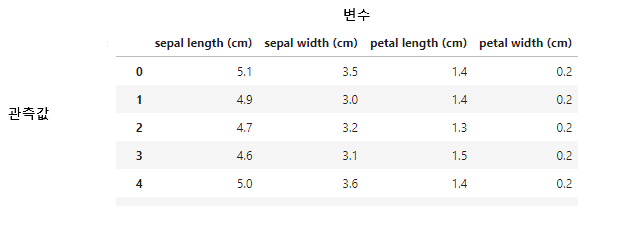

관측 변수는 데이터 속성에 따라서 이산형과 문자형으로 구분할 수 있다. 문자형은 대부분 범주형을 이룰 것이다.
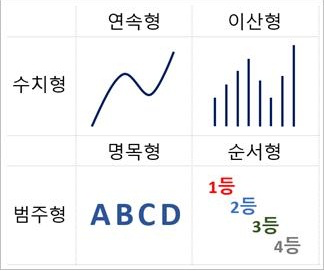

#### 현상 일반화하기: 통계적 추론

저자블로그 글: [데이터과학 프로세스(5): 통계적 추론](http://www.hellodatascience.com/?p=366)

> "통계로 거짓말을 하기는 쉽지만 진실을 말하기는 어렵다" - 안드레아 덩켈스

탐색적 분석으로 개별 속성값의 분포, 속성 간에 어떤 상관 관계가 존재하는지 등을 파악할 수 있었다.
데이터 분석의 목표는 관찰된 데이터를 넘어 그 근간에 있는 현상에 대한 더 나은 이해에 도달하는 것이다. 즉 부분적인 관찰을 통해 전체에 대한 판단을 내리는 **추론**이 필요한 것이다.
또한 **표본을 바탕으로 모집단의 특성에 대한 결론을 유도하는 것을  _통계적 추론statistical inference_**라고 한다. 이런 통계적 추론은 **통계 이론을 바탕으로 _현상의 일반화_** 라고 할 수 있다. 현상에 대한 관찰에서 일반화 할 수 있는 지식을 이끌어 내는 것이 과학의 본령이니 통계적 추론은 데이터 과학의 본질과 닿아 있다.


### 기본 통계량 구하기

데이터는 데이터의 개수, 값 출현 횟수로 규모를 파악할 수 있다.  일반적으로 어떤 데이터 집합에 대한 특징을 나타내는 대표값으로 기본 통계 측정값에 해당하는 평균, 중위수, 최빈수, 범위를 살펴보고 분산과 표준편차를 사용한다.

기술통계(Descriptive stastics) 계산을 제공한다.

 - 데이터 개수 : count
 - 평균: mean, average
 - 분산: variance
 - 표준편차: Standard deviation
 - 최대값: maximum
 - 최소값: minimum
 - 중앙값: median
 - 사분위수: quartile

> 통계학에서 몇몇 통계값이 모집단 데이터인가 표본인가에 따라 약간 차이가 있다. 여기서는 모집단에 대한 계산 방법으로 설명한다.

## 중심경향성: 평균,중앙값,최솟값,최댓값

데이터의 중심이 어디인지를 나타내는 중심 경향성 (Central tendency) 지표는 매우 중요하다.  

어떻게 분포되었는지 파악하는 중심경향으로 대부분 데이터 값을 데이터 위치의 개수로 나눈 평균을 사용할 수 있다. 평균을 통해서 각 지표가 전체 지표중에서 어느 위치인지를 파악하기 좋다.

- 평균
- 중앙값

이것은 데이터의 중심경향성과 관련있다.

### 평균(average) 

 - 산술평균: 보통 평균(mean)은 관측치의 총합을 관측치의 개수로 나누어 구한다
 - 기하평균: 관측치 수의 곱을 관측치의 제곱근을 취해서 산술하는 평균값이다.
 - 조화평균:

### 평균(산술평균)

평균은 주어진 데이터의 모든 요소의 합계를 요소의 수로 나눈 것으로 산술적으로 데이터의 합을 데이터 개수로 나눈 것이라 해서 산술평균으로도 불린다. 다음 같은 n 개 데이터를 가진 집합 x

$$
x = \{ x_1,x_2,\cdots,x_n \}
$$

집합 x의 산술 평균은 $\bar{x}$ 로 표기.

$$
\bar{x} = \frac{x_1 + x_2 + \cdots + x_n}{n} = \frac{1}{n}(\sum_{i=1}^n{x_i})
$$

In [4]:
df[['A지점']].mean()

A지점    249.769231
dtype: float64

평균은 쉽게 데이터의 경향을 파악할 수 있지만 극단적 이상치가 있으면 영향을 많이 받는다. 예를 들어 A지점은 4명인데 직원 연봉이 5000원 정도고, 지점장 연봉이 1.5억 이라면 이 지점의 평균 연봉은 7000만원이 된다. 이 평균 연봉이 직원들의 연봉을 대표하지 못한다. 


### 중앙값 Median

데이터에서 극단적인 이상값이 있으면 평균보다 가장 가운데 위치한 값을 사용하기도 한다. 중앙값(중위수, Median)은 데이터에서 가장 가운데 위치한 값을 말한다.

데이터 집합에서 중앙값을 찾기 위해서는 데이터 개수가 홀수라면 가장 가운데 위치 값을 사용하고, 짝수라면 가장 중앙에 있는 두 데이터의 평균을 의미한다. 데이터 개수에 따라서 아래 같이 찾는다.

- 홀수라면 가장 가운데 위치 값을 사용한다.
- 짝수라면 가장 중앙에 있는 두 데이터의 평균을 사용한다.

이를 정리하면 데이터 x의 중앙값 $\tilde{x}$ 는
$$
\tilde{x} = \begin{cases}
\frac{n+1}{2}, & \mbox{  n이 홀수} \\
\frac{n}{2} 와 \frac{n}{2}+1 번째 값의 평균, & \mbox{n이 짝수 }
\end{cases}
$$

4명 직원의 연봉 5000만원 , 지점장 1.5억인 경우

In [7]:
np.median([4*5000,15000])

17500.0

### 최솟값, 최댓값

가장 작거나 큰 값은 데이터를 오름차순으로 정렬해 처음과 마지막 값을 구하면 된다.

In [10]:
df[['A지점']].min(),df[['A지점']].max()

(A지점    237.0
 dtype: float64,
 A지점    262.0
 dtype: float64)

### ex)  모든 지점의 최대/최소 값을 구하라

In [12]:
for c in df.columns:
    print(c, df[c].min(), df[c].max())

A지점 237.0 262.0
B지점 246.0 270.0
C지점 261.0 279.0


In [13]:
df.min(), df.max()

(A지점    237.0
 B지점    246.0
 C지점    261.0
 dtype: float64,
 A지점    262.0
 B지점    270.0
 C지점    279.0
 dtype: float64)

### ex) 아래 데이터의 최소, 평균, 중앙, 최대 값을 구하라.

```
[4400, 4800, 5200, 5600, 15000]
```

In [14]:
data = np.array([4400, 4800, 5200, 5600, 15000])
data

array([ 4400,  4800,  5200,  5600, 15000])

In [16]:
data.min(), data.mean(), np.median(data), data.max()

(4400, 7000.0, 5200.0, 15000)

중앙값에서 최대값은 극단적으로 이상치를 보여주고 있다.

### 최빈값(Mode)

최빈값(mode)은 데이터에서 가장 빈번하게 출현하는 값으로 하나가 아니라 여러개가 될 수 있다. 히스토그람에서 가장 높은 막대가 최빈값이 된다.


In [17]:
df['A지점'].value_counts()

252.0    3
247.0    2
262.0    2
239.0    1
249.0    1
237.0    1
250.0    1
256.0    1
242.0    1
Name: A지점, dtype: int64

In [18]:
np.unique(df['A지점'], return_counts=True)

(array([237., 239., 242., 247., 249., 250., 252., 256., 262.]),
 array([1, 1, 1, 2, 1, 1, 3, 1, 2], dtype=int64))

In [22]:
rows, counts = np.unique(df['A지점'], return_counts=True)
'Median:', rows[counts.max()]

('Median:', 247.0)

### ex) 샘플 데이터에서 평균, 중앙값, 최빈값을 표시해 보자.

scipy.stats 모듈에서 왜도분포 데이터를 생성해 확인해 보자.

In [27]:
from scipy.stats import skewnorm

data = skewnorm.rvs(10, size=1000)
data_mean = data.mean()
data_median = np.median(data)
rows, counts = np.unique(data, return_counts=True)
data_mode = data[counts.max()]

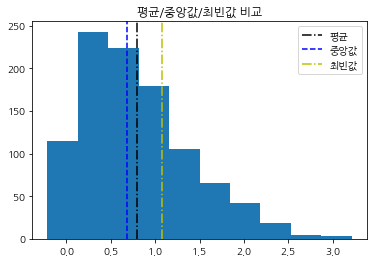

In [28]:
plt.hist(data)
plt.axvline(data_mean, c='k', ls='-.', label='평균')
plt.axvline(data_median, c='b', ls='--', label='중앙값')
plt.axvline(data_mode, c='y', ls='-.', label='최빈값')
plt.title('평균/중앙값/최빈값 비교')
plt.legend()
plt.show()

## 산포도 Disperison

산포도(Dispersion)은 데이터가 얼마나 퍼져있는지를 보여준다. 보통 산포도 값이 0에 근접하면 데이터가 거의 퍼저 있지 않다는 의미이고, 그보다 크면 매우 퍼져 있다는 의미이다. 산포도를 측정하는 방법으로 **범위range**, **분위variance**, **표준편차 standard deviation** 이 있다.


산포도에서 0,100 으로 구성된 데이터나, 0,100 그리고 50으로 구성된 데이터는 동일한 퍼짐을 갖는다. 데이터만 보면 0,100 이 더 포진 느낌이 든다.

#### 데이터의 범위 - range

가장 큰 값과 작은 값의 차이가 범위가 된다. 보통 산포도 함수는 range()를 쓰는데, 파이썬에는 range()라는 리스트 함수가 있다.


In [29]:
df['A지점'].max() - df['A지점'].min()

25.0

`nsmallest()`, `nlargeest()` 로 row 단위로 확인 가능하다.

In [32]:
df.nsmallest(3, 'A지점')

,A지점,B지점,C지점
날짜,,,
2020-07-03,237.0,270.0,271.0
2020-07-01,239.0,246.0,268.0
2020-07-16,242.0,262.0,275.0


### 편차와 분산

데이터 집합에서 평균을 기준으로 얼마나 퍼져 있는지를 알려주는 지표가 분산(Variance) 과 편차(Deviation) 이다. 
 - 편차는 각 요소가 평균에서 얼마나 떨어졌는지를 알려주고, 
 - 분산은 요소들의 편차의 제곱의 합을 측정해 산포도를 측정하는 개념이다.





### 분산 Variance

분산은 요소들의 편차를 측정해 평균을 기준으로 얼마나 퍼져있는지를 알 수 잇다. 분산은 편차의 제곱의 합을 요소 개수로 나눈 것이다. 표준편차는 분산의 제곱근이다.

요소의 개수가 N인 모집단 데이터의 분산($\sigma_x^2$, 모분산)과 분산에 제곱근을 씌운 표준편차($\sigma_x$) 는 다음 같다.


$$
\sigma_x^2 = \frac{1}{n} \sum_{i=1}^{N} (x_i - \bar{x})^2 
\\
\sigma_x = \sqrt{\frac{1}{N} \sum_{i=1}^{N} (x_i - \bar{x})^2}
$$


평균을 $\mu$ 로 표현하면 다음 같이 쓰기도 한다.

$$
\sigma_x^2 = \frac{1}{n} \sum_{i=1}^{N} (x_i - \mu)^2 = \frac{1}{N}\{ (x_1 - \mu)^2 + (x_2 - \mu)^2 + \cdots (x_N - \mu)^2 \}
$$


분산과 표준편차는 데이터의 흩어진 정도를 말해준다. 분산 값이 높다는 것은 평균에서 멀리 떨어져 있다는 것이다. 낮은 분산 값은 평균에 가깝게 뭉쳐 있다는 것을 의미한다. 


#### ex) A, B 데이터의 히스토그람을 서브플롯에 그려보자

데이터 A와 B가 있을 때 데이터 평균이 같더라도 표준편차(혹은 분산)이 큰 쪽의 데이터는 각 요소가 더 많이 흩어져 있다는 의미다.

In [33]:
A = np.array([50,60,70,80,90,100,100,100,100,110,120,130,140,150])
B = np.array([80,80,90,90,90,100,100,100,100,110,110,110,120,120])

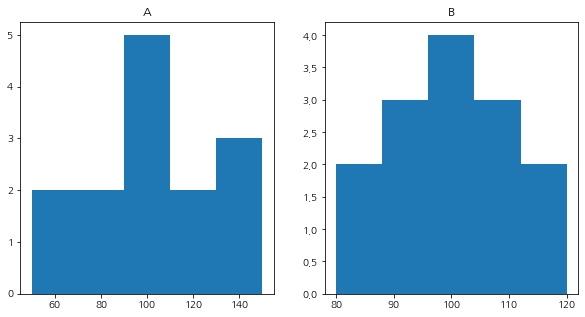

In [42]:
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.title('A')
plt.hist(A,bins=5)

plt.subplot(122)
plt.title('B')
plt.hist(B,bins=5)

plt.show()

## pandas로 통계량 알아보기

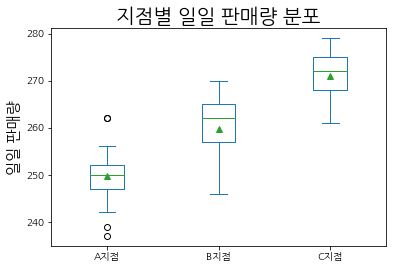

In [50]:
# 박스 그래프 그리기
ax = df.plot.box(y=["A지점", "B지점", "C지점"], showmeans=True) # 박스 그래프
ax.set_ylabel("일일 판매량", fontsize=15)                        # y축 라벨을 추가
ax.set_title("지점별 일일 판매량 분포", fontsize=20)             # 그래프 제목을 추가

# 그래프를 이미지 파일로 저장
image_file = 'works/지점별_일일_판매량_분포.png'
plt.savefig(image_file, dpi=300) 
plt.show()

#### 엑셀로 저장

구한 기본통계량을 엑셀 그래프로 저장해보자.

In [51]:
import pandas as pd

# 저장할 엑셀 파일 경로
excel_file= '지점별_일일_판매량_기본통계량_박스그래프.xlsx' 
sheet = 'Sheet1'

# 쓰기 엔진을 xlsxwriter로 지정해 판다스의 ExcelWriter 객체 생성
excel_writer = pd.ExcelWriter(excel_file, engine='xlsxwriter')

# DataFrame 데이터(df)를 생성한 엑셀 객체에 쓰기(시트 이름을 지정)
df.to_excel(excel_writer, sheet_name=sheet) # index를 포함

# 워크시트에 위치를 지정해 DataFrame 데이터(df_stat) 쓰기
row = 0 # 행 위치
col = len(df.columns) + 2 # 열 위치
df.to_excel(excel_writer, startrow=row, startcol=col, sheet_name=sheet)

# 생성한 ExcelWriter 객체(excel_writer)를 이용해 워크시트 객체 생성
worksheet = excel_writer.sheets[sheet]

# 워크시트 객체(worksheet)에 이미지가 들어갈 위치를 지정해 이미지 넣기
row = len(df.index) + 2  # 행 위치
col = len(df.columns) + 2     # 열 위치
worksheet.insert_image(row, col, image_file, {'x_scale': 0.6, 'y_scale': 0.6})

# 객체를 닫고 엑셀 파일로 저장
excel_writer.save()

print("생성 파일:", excel_file) # 생성한 파일 이름 출력

생성 파일: 지점별_일일_판매량_기본통계량_박스그래프.xlsx


## 관측 데이터 분할

데이터 파일에 A,B,C 지점의 년간 데이터를 사용해서 월별로 통계량을 엑셀에 작성해 보자.

In [52]:
import pandas as pd

#  데이터 파일의 전체 경로
csv_file = 'data/지점별_판매량-2019년.csv' 

# CSV 파일 읽기, CSV 파일의 '날짜' 열을 DataFrame 데이터의 index로 지정
df = pd.read_csv(csv_file)

# DataFrame 데이터 출력
df

,날짜,A지점,B지점,C지점
0,2019-01-01,239.0,249.0,269.0
1,2019-01-02,249.0,264.0,268.0
2,2019-01-03,237.0,250.0,268.0
3,2019-01-04,252.0,260.0,273.0
4,2019-01-07,252.0,260.0,269.0
...,...,...,...,...
256,2019-12-25,255.0,273.0,264.0
257,2019-12-26,254.0,263.0,260.0
258,2019-12-27,273.0,253.0,261.0
259,2019-12-30,243.0,260.0,263.0


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      261 non-null    object 
 1   A지점     261 non-null    float64
 2   B지점     261 non-null    float64
 3   C지점     261 non-null    float64
dtypes: float64(3), object(1)
memory usage: 8.3+ KB


날짜 형식

In [54]:
df['날짜'] = pd.to_datetime(df['날짜']) 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      261 non-null    datetime64[ns]
 1   A지점     261 non-null    float64       
 2   B지점     261 non-null    float64       
 3   C지점     261 non-null    float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 8.3 KB


월별 freq=M 로 그룹으로 묶고 월별로 리스트에 담아 다루어 보자.

In [55]:
df_months = [group for name, group in df.groupby(pd.Grouper(key='날짜',freq='M'))]
df_months[0].head() # 1월 데이터 일부를 출력

,날짜,A지점,B지점,C지점
0,2019-01-01,239.0,249.0,269.0
1,2019-01-02,249.0,264.0,268.0
2,2019-01-03,237.0,250.0,268.0
3,2019-01-04,252.0,260.0,273.0
4,2019-01-07,252.0,260.0,269.0


다음은 12월의 데이터이다.

In [59]:
df_months[11].head()

,날짜,A지점,B지점,C지점
239,2019-12-02,253.0,253.0,268.0
240,2019-12-03,256.0,258.0,268.0
241,2019-12-04,250.0,260.0,273.0
242,2019-12-05,238.0,259.0,271.0
243,2019-12-06,244.0,262.0,275.0


월별 데이터를 가지고 기본 통계량을 사용해 보자.

In [62]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

# 한글 폰트를 위한 설정
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

        
# 월별 데이터, 기본 통계량, 박스 그래프를 셀 파일에 쓰는 함수
# 입력 인수: 엑셀 파일 경로, DataFrame 데이터 리스트
# 반환: 없음
def write_stat_data_box_plot_to_excel_sheet(write_excel_file, df_months):
    # 쓰기 엔진을 xlsxwriter로 지정해 판다스의 ExcelWriter 객체 생성
    excel_writer = pd.ExcelWriter(write_excel_file, engine='xlsxwriter') 

    for month_num, df_month in enumerate(df_months): # 월별로 수행
        # 기본 통계량 구하기
        df_month_stat = df_month.describe()
        
        # 시트 이름 생성
        sheet = "{0:2d}월".format(month_num + 1)
        
        # '날짜'열을 datetime 형식에서 문자열로 변환
        df_month['날짜'] = df_month['날짜'].astype(str) 
        
        # DataFrame 데이터의 '날짜'열을 index로 지정
        df_month = df_month.set_index(['날짜']) 
        
        # DataFrame 데이터를 생성한 엑셀 객체에 쓰기(시트이름을 지정)       
        df_month.to_excel(excel_writer, sheet_name = sheet) # index를 포함

        # 워크시트에 위치를 지정해 기본 통계량 데이터(df_month_stat) 쓰기
        row = 0 # 행 위치
        col = len(df_month.columns) + 2  # 열 위치
        df_month_stat.to_excel(excel_writer, sheet_name=sheet,
                               startrow=row, startcol=col)
        
        # ------ 박스 그래프 그리고 이미지 파일로 저장하기 --------------
        ax = df_month.plot.box(y=["A지점", "B지점", "C지점"], 
                               showmeans=True) # 박스 그래프
        ax.set_ylabel("일일 판매량", fontsize=15)  # y 라벨 추가
        ax.set_title("지점별 일일 판매량 분포", fontsize=20) # 그래프 제목 추가

        # 박스 그래프의 이미지 파일 경로
        image_file = "data/지점별_일일_판매량_분포_{0:02d}월.png".format(month_num + 1) 

        plt.savefig(image_file, dpi=300) # 그래프를 이미지 파일로 저장
        plt.close() # 화면에 그래프를 표시하지 않고 닫기
        # ----------------------------------------------------------------
        
        # 생성한 ExcelWriter 객체(excel_writer)를 이용해 워크시트 객체 생성
        worksheet = excel_writer.sheets[sheet]

        # 워크시트 객체(worksheet)에 이미지가 들어갈 위치를 지정해 이미지 넣기
        row = len(df_month_stat.index) + 2  # 행 위치
        col = len(df_month.columns) + 2  # 열 위치
        worksheet.insert_image(row, col, image_file, 
                               {'x_scale': 0.6, 'y_scale': 0.6})

    # 객체를 닫고 엑셀 파일로 저장
    excel_writer.save()

이제 연간 데이터 파일을 

In [63]:
# 데이터 파일에서 DataFrame 데이터 가져오기
csv_file = 'data/지점별_판매량-2019년.csv' 
df = pd.read_csv(csv_file)

# DataFrame 데이터 중 '날짜'열의 데이터 타입을 datetime 형식으로 변환
df['날짜']= pd.to_datetime(df['날짜']) 

# 월별로 DataFrame 데이터 묶기(그룹핑)
df_months = [group for name, group in df.groupby(pd.Grouper(key='날짜',freq='M'))]

# 저장할 엑셀 파일 경로
excel_file = 'data/지점별_일일_판매량_기본통계량_박스그래프-2019년.xlsx' 

# DataFrame 데이터, 기본 통계량, 박스 그래프를 엑셀 파일에 쓰는 함수 호출
write_stat_data_box_plot_to_excel_sheet(excel_file, df_months)

print("생성 파일:", excel_file) # 생성한 파일 이름 출력

생성 파일: data/지점별_일일_판매량_기본통계량_박스그래프-2019년.xlsx


# 2. 통계 데이터 분석 심화

보통 날씨가 더우면 아이스 아메리카노가 많이 팔릴 것이다. 유동 인구가 많은 지역 건물 임대료는 그렇지 않은 지역에 비해 높을 것이다. 온도와 커피의 관계, 유동 인구와 임대료의 관계 등 특정 변수 사이의 관계는 경험을 통해 알수 있지만 통계 기법으로 어떤 관계인지 분석해 보자.

### 상관 분석

기술적으로 2개의 변수가 있을 때 이 둘이 선형적으로 어떤 관계를 갖는지 파악하는 것이 상관분석이다. 두 데이터의 관계성을 나타내는 것이 **공분산**과 **상관관계**이다.  여기서 먼저 분산과 비슷한 공분산을 살펴보자.



### 공분산(Covariance, Commaon Variance)

분산은 한 변수가 평균에서 얼마나 떨어져 있는지를 살펴본다. 공분산은 ***두 변수가 각각의 평균에서 얼마나 떨어져 있나*** 를 살펴본다. 아래 같이 계산한다.

In [64]:
# 공분산 함수
def covariance(x, y):
    n = len(x)
    return dot(de_mean(x), de_mean(y)) / (n-1)

그래서 공분산이 양수 이면 x값이 클수록 y 값이 크고, x 값이 작을 수록 y 값도 작다. 반대로 음수이면 x값이 클수록 y값이 작고, x값이 작을 수록 y값이 크다는 의이미다. 공분산이 0이면 그와 같은 관계가 성립하지 않는다는 의미이다.

그런데 공분산 계산 결과는 공분산 단위가 데이터 요소들을 곱해서 계산하므로 이해하기 쉽진 않다. 

예를 들어 `친구 수 X 하루 사용량(분)` 이라는 단위는 어떤 의미인가?

그러므로 모든 사용자의 하루 사용량은 변하지 않고 친구 수만 두 배로 증가한다면 공분산 또한 두 배로 증가할 것이다 하지만 두 변수의 상관관계는 변하지 않는다. 이것은 값이 커진다고 공분산이 크다고 판단하기 어렵게 한다.  

관계를 상관계수(correlation coefficient) 를 통해 파악할 수 있다.


이런 이유로 공분산에서 표준편차를 나눠 준 상관관계를 더 자주 살펴본다.  두 데이터 사이의 관계의 특성과 강도를 알려주는 통계 측정값으로 피어슨 상관계수가 있다.  상관계수를 구하는 여러 방법이 있다. 일반적으로 상관계수라고 하면 피어슨 상관계수를 말한다.


### 피어슨 상관계수(Pearson's product-moment correlation coefficent)

피어슨 상관계수는 연속형 변수 2개의 상관 관계를 확인하는 방법이다. 두 개의 수치값 집합에서 수치값 각각의 순서쌍에 대해 연결 관계가 있다고 할 때 관련성을 확인하는 것이다.

예를 들어 고등학교 한 학급에 50명이 있고 국어, 영어, 수학, 과학 시험을 치른 결과가 있을때, 이 중에서 과학과 수학 과목의 성적이 서로 관련있는지 파악할 수 있다.

또한 *사용자가 사이트에서 보낸 시간과 소셜 친구수 사이의 연관성* 같은 가설을 검증할 수 있다.

피어슨 상관계수는 정규분포에서 가장 잘 작동하도록 설계되어 있다.

- [상관관계](http://intothedata.com/02.scholar_category/statistics/correlation/) 참조.


### 상관계수 계산

상관계수 Correlation 공식다음 같다. 요소 개수가 N인 두 모집단 집합 x, y 에 대해서 피어슨 상관계수 $\rho_{xy}$ 식은 아래 같다.
$$
\rho_{xy} = \frac{\sigma_{xy}}{\sigma_x \sigma_y}
$$

- $\rho_{xy}$ : 모공분산 (population covariance)  
- $\sigma_x, \sigma_y$ : 각 모집단 x, y의 모표준편차

모 공분산 $\sigma_{xy}$ 는 다음 같다

$$
\sigma_{xy} = \frac{1}{N} \sum_{i=1}^{N} (x_i - \mu_{x})(y_i - \mu_{y}) 
$$

- $\mu_{x}, \mu_{y}$ : x,y 의 평균

요소 개수가 n인 표본 데이터 집합 x, y 에 대한 표본의 피어슨 상관계수 $r_{xy}$ 식은 아래 같다.
$$
r_{xy} = \frac{S_{xy}}{S_x S_y}
$$

 - $S_{xy}$ : 표본 공분산 Sample Covariance
 - $S_x, S_y $: 표본 x,y의 표본 표준편차

표본 공분산 $S_{xy}$ 는 다음 같다

$$
S_{xy} = \frac{1}{n-1} \sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y}) 
$$

- $\bar{x}, \bar{y}$ : x,y 의 평균

### 상관 관계의 측정 상관계수

상관계수는 *-1.0~1.0* 사이의 값을 갖으며, 0에 가까울 수 록 관계가 없음을 1에 가까울 수록 강한 양의 관계를 표현한다.


 - 상관계수가 0이면 두 집단간 선형 관계가 없다는 의미이다. 
     - 그렇다고 서로 독립적이라는 의미는 아니다
     - 둘 사이 비선형 관계가 있을 수 있다.
 - 1이거나 1에 가까우면 강한 양의 선형 관계가 있음을 의미하고, 
     - 1이면 완전한 양의 상관관계이다.
 - -1이거나 -1에 가까우면 강한 음의 관계가 있고
     - -1은 완전한 음의 상관관계이다.


**[상관 계수에 대한 주요 결과 해석](https://support.minitab.com/ko-kr/minitab/18/help-and-how-to/statistics/basic-statistics/how-to/correlation/interpret-the-results/key-results/)**

- 강도:
    상관 계수 값의 범위는 −1부터 +1까지로, 계수의 절대값이 클수록 변수 사이에 강한 관계가 있습니다. Pearson 상관의 경우 절대값 1은 완전한 선형 관계를 나타냅니다. 0에 가까운 상관 값은 변수 사이에 선형 관계가 없음을 나타냅니다.
- 방향:
    계수의 부호는 관계의 방향을 나타냅니다. 두 변수가 함께 증가하거나 감소하는 경향이 있으면 계수가 양수이며, 상관을 나타내는 선이 위쪽 방향으로 기울어집니다. 한 변수가 증가할 때 다른 변수는 감소하는 경향이 있으면 계수는 음수이며, 상관을 나타내는 선이 아래쪽 방향으로 기울어집니다.
    

> 또한 두 집단 사이의 비선형 상관계수를 측정하는 방법도 있지만 여기서는 다루지 않는다.



이런 상관계수를 산점도로 보면

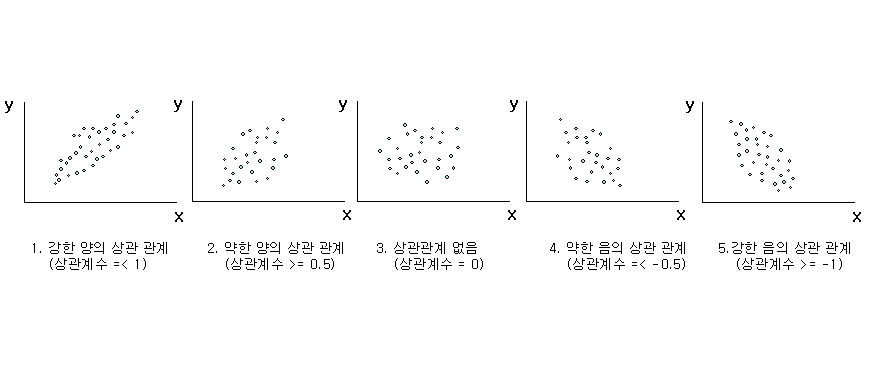



## 판매량 상관분석

In [66]:
import pandas as pd

#  데이터 파일의 전체 경로
csv_file ='data/아이스크림판매량_기온.csv'

# CSV 파일 읽기
df = pd.read_csv(csv_file)

# DataFrame 데이터 출력
df.head()

,기온,아이스커피판매량
0,14.3,90
1,16.2,113
2,18.6,109
3,20.3,120
4,22.5,125


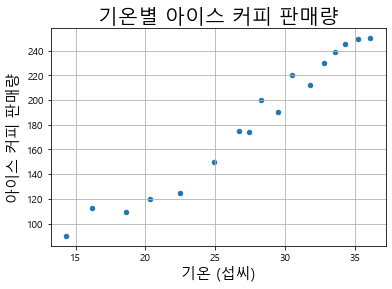

In [67]:
ax_scatter = df.plot.scatter(x='기온', y='아이스커피판매량', grid=True)

ax_scatter.set_xlabel("기온 (섭씨)", fontsize=15)
ax_scatter.set_ylabel("아이스 커피 판매량", fontsize=15)
ax_scatter.set_title("기온별 아이스 커피 판매량", fontsize=20)

plt.show()

모든 변수에 대한 상관계수를 구해보자, 데이터프레임은 상관행렬로 반환한다.

In [68]:
df.corr() # DataFrma 데이터(df)의 상관 계수 구하기

,기온,아이스커피판매량
기온,1.000000,0.982405
아이스커피판매량,0.982405,1.000000


### 여러 변수 사이의 상관관계 분석

In [77]:
from sklearn.datasets import load_iris
iris = load_iris()

In [79]:
df = pd.DataFrame(iris.data,
                  columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


산점도와 히스토그람을 한번에 그릴 수 있는 scatter_matrix() 를 사용해 보ㅓ자.

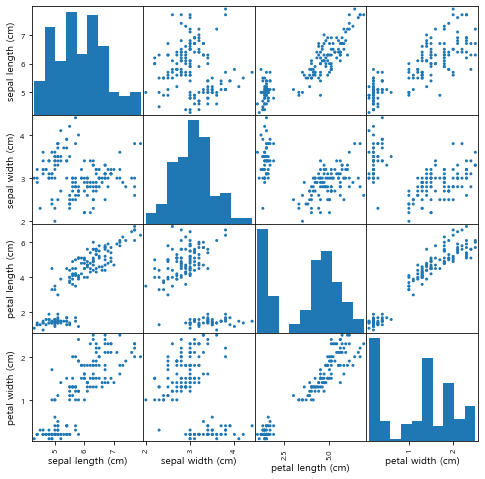

In [80]:
from pandas.plotting import scatter_matrix

# (alpha 옵션은 0~1 사이의 실수로 지정)
scatter_matrix(df, alpha=1, figsize=(8, 8)) 
plt.show()

결과를 보면 peta_length와 petal_width 가 양의 상관관계를 갖는 것으로 보인다. 상관계수를 출력해 보자.

In [81]:
df.corr() # DataFrame 데이터(df)의 상관 계수 구하기

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


---

# 참고
 - 엑셀자동화 / 9장 엑셀과 파이썬을 이용한 통계 데이터 분석